In [2]:
from sklearn.svm import SVR
import os, zipfile
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
df=pd.read_csv("final_data_v4.csv")
df= df.set_index("Unnamed: 0")
df = df.drop(['underlying_price','log_price'],axis=1)
display(df)


,log_ret,-10-180,-10-360,-10-90,-15-180,-15-30,-15-360,-15-60,-15-90,-20-180,...,10-360,10-90,5-360,5-60,30_days_skew,60_days_skew,90_days_skew,120_days_skew,180_days_skew,360_days_skew
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000000,0.2267,0.2105,0.2407,0.2506,0.3124,0.2295,0.2832,0.2708,0.2738,...,0.1590,0.1201,0.1790,0.1399,0.3406,0.3895,0.4059,0.4065,0.3884,0.3197
2016-01-05,0.002010,0.2206,0.2061,0.2315,0.2440,0.2978,0.2252,0.2710,0.2609,0.2671,...,0.1540,0.1123,0.1744,0.1324,0.3383,0.3759,0.3966,0.4009,0.3836,0.3215
2016-01-06,-0.013202,0.2259,0.2106,0.2384,0.2489,0.3024,0.2291,0.2771,0.2668,0.2715,...,0.1600,0.1220,0.1799,0.1448,0.3130,0.3551,0.3815,0.3859,0.3743,0.3157
2016-01-07,-0.023986,0.2411,0.2211,0.2599,0.2642,0.3435,0.2398,0.3046,0.2889,0.2871,...,0.1711,0.1433,0.1909,0.1720,0.3091,0.3549,0.3767,0.3853,0.3740,0.3205
2016-01-08,-0.010898,0.2474,0.2258,0.2672,0.2705,0.3489,0.2444,0.3127,0.2962,0.2936,...,0.1763,0.1514,0.1960,0.1803,0.2932,0.3502,0.3718,0.3804,0.3725,0.3207
2016-01-11,0.000853,0.2400,0.2209,0.2564,0.2638,0.3401,0.2399,0.3020,0.2869,0.2878,...,0.1704,0.1372,0.1902,0.1624,0.3163,0.3708,0.3870,0.3922,0.3805,0.3243
2016-01-12,0.007773,0.2326,0.2163,0.2457,0.2559,0.3186,0.2348,0.2878,0.2757,0.2792,...,0.1675,0.1314,0.1870,0.1526,0.2997,0.3561,0.3745,0.3779,0.3670,0.3112
2016-01-13,-0.025282,0.2477,0.2273,0.2651,0.2711,0.3409,0.2460,0.3084,0.2948,0.2945,...,0.1799,0.1507,0.1989,0.1757,0.2987,0.3528,0.3693,0.3733,0.3628,0.3125
2016-01-14,0.016558,0.2398,0.2203,0.2566,0.2635,0.3363,0.2388,0.3012,0.2864,0.2874,...,0.1716,0.1397,0.1912,0.1638,0.3258,0.3695,0.3795,0.3822,0.3686,0.3135


In [3]:
cols= df.columns
for i in range(1,6):
    for j in cols:
        ncol = str(j)+'-'+str(i)
        df[ncol] = df[j].shift(i)
display(df)

,log_ret,-10-180,-10-360,-10-90,-15-180,-15-30,-15-360,-15-60,-15-90,-20-180,...,10-360-5,10-90-5,5-360-5,5-60-5,30_days_skew-5,60_days_skew-5,90_days_skew-5,120_days_skew-5,180_days_skew-5,360_days_skew-5
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000000,0.2267,0.2105,0.2407,0.2506,0.3124,0.2295,0.2832,0.2708,0.2738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.002010,0.2206,0.2061,0.2315,0.2440,0.2978,0.2252,0.2710,0.2609,0.2671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,-0.013202,0.2259,0.2106,0.2384,0.2489,0.3024,0.2291,0.2771,0.2668,0.2715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,-0.023986,0.2411,0.2211,0.2599,0.2642,0.3435,0.2398,0.3046,0.2889,0.2871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,-0.010898,0.2474,0.2258,0.2672,0.2705,0.3489,0.2444,0.3127,0.2962,0.2936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,0.000853,0.2400,0.2209,0.2564,0.2638,0.3401,0.2399,0.3020,0.2869,0.2878,...,0.1590,0.1201,0.1790,0.1399,0.3406,0.3895,0.4059,0.4065,0.3884,0.3197
2016-01-12,0.007773,0.2326,0.2163,0.2457,0.2559,0.3186,0.2348,0.2878,0.2757,0.2792,...,0.1540,0.1123,0.1744,0.1324,0.3383,0.3759,0.3966,0.4009,0.3836,0.3215
2016-01-13,-0.025282,0.2477,0.2273,0.2651,0.2711,0.3409,0.2460,0.3084,0.2948,0.2945,...,0.1600,0.1220,0.1799,0.1448,0.3130,0.3551,0.3815,0.3859,0.3743,0.3157
2016-01-14,0.016558,0.2398,0.2203,0.2566,0.2635,0.3363,0.2388,0.3012,0.2864,0.2874,...,0.1711,0.1433,0.1909,0.1720,0.3091,0.3549,0.3767,0.3853,0.3740,0.3205


In [4]:
size = 494
mselin=np.zeros(len(cols[1:41]))
msepoly=np.zeros(len(cols[1:41]))
pred = np.zeros((749-size,len(cols[1:41])))
truey = np.zeros((749-size,len(cols[1:41])))
for i in range(1,len(cols[1:41])+1):
    ndf =df
    ndf['log_ret_t+1'] = ndf['log_ret'].shift(-1)
    tp1 = str(cols[i])+'t+1'
    ndf[tp1] = df[cols[i]].shift(-1)
    ndf = ndf.drop(['2016-01-04','2016-01-05','2016-01-06','2016-01-07','2016-01-08','2019-01-02'])
    Xfull = ndf.drop([tp1],axis=1).values
    Yfull = ndf[tp1].values
    size = int(len(Xfull) * 0.66)
    X, X_test = Xfull[0:size], Xfull[size:len(Xfull)]
    y, y_test = Yfull[0:size], Yfull[size:len(Xfull)]
    svr_lin = SVR(kernel='linear', C=8, gamma='auto',epsilon=0.0002)
    svr_poly = SVR(kernel='poly', C=8, gamma='auto', degree=3, epsilon=.0002,coef0=1)
    y_lin = svr_lin.fit(X, y).predict(X_test)
    y_poly = svr_poly.fit(X, y).predict(X_test)
    mselin[i-1]=mean_squared_error(y_lin,y_test)
    msepoly[i-1]=mean_squared_error(y_poly,y_test)
    print(i)
    pred[:,i-1] = y_lin
    truey[:,i-1] = y_test

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [5]:
print (cols)
print (mselin)

print (np.mean(mselin))



Index(['log_ret', '-10-180', '-10-360', '-10-90', '-15-180', '-15-30',
       '-15-360', '-15-60', '-15-90', '-20-180', '-20-360', '-20-90',
       '-25-120', '-25-180', '-25-360', '-25-90', '-30-120', '-30-180',
       '-30-360', '-35-120', '-35-180', '-35-360', '-40-180', '-40-360',
       '-40-60', '-40-90', '-45-120', '-45-360', '-45-60', '-45-90', '-5-30',
       '-5-360', '-50-120', '-50-360', '-50-90', '0-360', '10-180', '10-360',
       '10-90', '5-360', '5-60', '30_days_skew', '60_days_skew',
       '90_days_skew', '120_days_skew', '180_days_skew', '360_days_skew'],
      dtype='object')
[2.47856714e-05 7.98314960e-06 3.25627210e-05 1.42433880e-06
 7.90552624e-05 3.24031358e-06 9.22287560e-06 2.78356565e-06
 1.68227400e-06 7.12183978e-07 3.16271243e-06 3.46890237e-06
 3.61543800e-06 1.47662486e-06 2.61787164e-06 3.35784671e-06
 1.41824262e-06 1.18594621e-06 6.53912129e-06 2.21053473e-06
 3.80634289e-06 3.33687357e-06 4.98325497e-06 7.52727821e-05
 3.40356649e-05 1.93150873e-05

-45-60


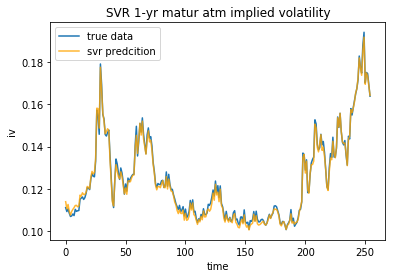

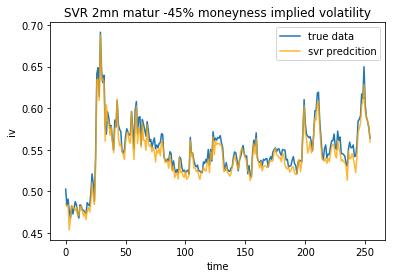

MSE for atm 1yr iv SVR models: 
 7.371963389966583e-06
MSE for -45% moneyness 2mn iv SVR models: 
 6.197983053246013e-05
Average MSE for SVR models: 
 1.6396468617694122e-05


In [7]:
print (cols[28])
plt.plot(pred[:,36],label='true data')
plt.plot(truey[:,36],color='orange',alpha=0.8,label='svr predcition')
plt.title("SVR 1-yr matur atm implied volatility")
plt.xlabel("time")
plt.ylabel("iv")
plt.legend()
plt.show()

plt.plot(pred[:,27],label='true data')
plt.plot(truey[:,27],color='orange',alpha=0.8,label='svr predcition')
plt.title("SVR 2mn matur -45% moneyness implied volatility")
plt.xlabel("time")
plt.ylabel("iv")
plt.legend()
plt.show()
print ("MSE for atm 1yr iv SVR models: \n" , mean_squared_error(truey[36], pred[36]))
print ("MSE for -45% moneyness 2mn iv SVR models: \n" , mean_squared_error(truey[27], pred[27]))
print ("Average MSE for SVR models: \n" , mean_squared_error(truey, pred))

In [31]:
df['log_ret_t+1'] = df['log_ret'].shift(-1)
df['0-360t+1'] = df['0-360'].shift(-1)
df = df.drop(['2016-01-04','2016-01-05','2016-01-06','2016-01-07','2016-01-08','2019-01-02'])
print(df.isnull().values.any())

False


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


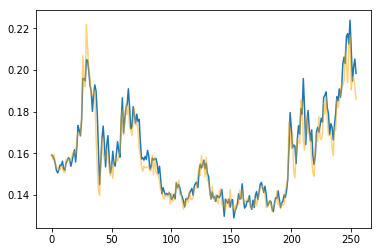

3.99564557195083e-05


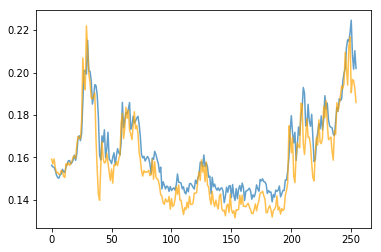

8.44933459945219e-05


In [25]:
Xfull = df.drop(['0-360t+1'],axis=1).values
Yfull = df['0-360t+1'].values
size = int(len(Xfull) * 0.66)
X, X_test = Xfull[0:size], Xfull[size:len(Xfull)]
y, y_test = Yfull[0:size], Yfull[size:len(Xfull)]
svr_lin = SVR(kernel='linear', C=1, gamma='auto',epsilon=0.0001)
y_lin = svr_lin.fit(X, y).predict(X_test)
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1,epsilon=0.0001).fit(X, y)
y_rbf = svr_rbf.predict(X_test)
print (svr_lin)
plt.plot(y_lin)
plt.plot(y_test,color='orange',alpha=0.5)
plt.show()
print(mean_squared_error(y_lin,y_test))
plt.plot(y_rbf,alpha=0.7)
plt.plot(y_test,color='orange',alpha=0.7)
plt.show()
print(mean_squared_error(y_rbf,y_test))